# Imports

In [1]:
import pandas as pd
import numpy as np

# Acquisition

In [44]:
#column names are already the first row of the .tsv, no need to explicitly tell the method to use them
df=pd.read_table('5_results_dirty.tsv')

In [45]:
#are there anomalies in min/max values?
print(df.describe())

               APSI    APSSI           SPS           SCI      braliSCI  \
count  94950.000000  94950.0  94950.000000  94950.000000  94950.000000   
mean      68.557504     -1.0      0.595017      0.930397     93.983044   
std       19.517234      0.0      0.334602      0.221900     17.189719   
min       16.000000     -1.0     -1.000000     -1.000000     66.000000   
25%       51.000000     -1.0      0.274187      0.817900     80.000000   
50%       71.000000     -1.0      0.610669      0.958400     93.000000   
75%       87.000000     -1.0      0.957627      1.060100    104.000000   
max       95.000000     -1.0      1.000000      2.014000    175.000000   

               uniq             k  
count  94950.000000  94950.000000  
mean       1.652185      3.710321  
std        1.497587      2.769626  
min        1.000000      2.000000  
25%        1.000000      2.000000  
50%        1.000000      3.000000  
75%        2.000000      5.000000  
max       21.000000     15.000000  


In [5]:
#SPS is an interesting column, let's see a simple representation grouped by method
by_meth=df.groupby('method')
print(by_meth.describe().SPS)

method         
beagles   count    18990.000000
          mean         0.568329
          std          0.347455
          min          0.020000
          25%          0.221786
          50%          0.581232
          75%          0.949239
          max          1.000000
mafftx    count    18990.000000
          mean         0.678755
          std          0.313320
          min         -1.000000
          25%          0.352941
          50%          0.762712
          75%          1.000000
          max          1.000000
mlocarna  count    18990.000000
          mean         0.602044
          std          0.327181
          min          0.000000
          25%          0.283750
          50%          0.655109
          75%          0.929293
          max          1.000000
raf       count    18990.000000
          mean         0.649656
          std          0.317930
          min         -1.000000
          25%          0.337838
          50%          0.682171
          75%          0

In [6]:
df.head(10)

,method,dataset,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
0,mafftx,SRP_euk_arch,31,-1,0.167164,0.8495,96,1,2
1,mafftx,SRP_euk_arch,45,-1,0.136054,0.9582,87,1,2
2,mafftx,SRP_euk_arch,36,-1,0.115152,0.5542,77,1,2
3,mafftx,SRP_euk_arch,57,-1,0.218543,1.0035,110,1,2
4,mafftx,SRP_euk_arch,56,-1,0.717608,1.1120,110,2,2
5,mafftx,SRP_euk_arch,42,-1,0.615894,0.9806,106,1,2
6,mafftx,SRP_euk_arch,55,-1,0.286195,0.9651,103,1,2
7,mafftx,SRP_euk_arch,95,-1,1.000000,1.0127,106,1,2
8,mafftx,SRP_euk_arch,95,-1,1.000000,0.9907,102,1,2
9,mafftx,SRP_euk_arch,59,-1,0.653968,0.9494,98,1,2


In [7]:
df.tail(5)

,method,dataset,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
94945,raf,Entero_CRE,86,-1,1.000000,0.8019,72,1,15
94946,raf,Entero_CRE,80,-1,1.000000,0.8334,71,1,15
94947,raf,HepC_CRE,87,-1,1.000000,0.9159,93,1,15
94948,raf,HepC_CRE,86,-1,0.258824,0.8893,97,1,15
94949,raf,HepC_CRE,86,-1,0.948086,0.8649,88,1,15


In [11]:
df.sample(5)

,method,dataset,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
84762,raf,Entero_CRE,74,-1,1.000000,1.0803,79,1,2
53780,beagles,5S_rRNA,66,-1,0.596774,0.8077,77,1,3
72234,mlocarna,HCV_SLVII,75,-1,0.631313,0.8403,76,1,3
60844,mlocarna,tRNA,51,-1,0.972973,1.1938,117,1,2
17691,mafftx,IRES_HCV,87,-1,0.250556,0.7916,83,1,5


# Cleaning

In [12]:
#The -1 in SPS/SCI columns are missing data. It's better to turn them into NaN (Not a Number), because lots of methods rely on this
#notation to take care of "problems"
df.SPS=df.SPS.replace(-1, np.nan)
df.SCI=df.SCI.replace(-1,np.nan)

In [13]:
#let's see how many NaNs are there, the isnull method returns a boolean mask for each element of the df...
df.isnull()

,method,dataset,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [14]:
#...which, combined with the any() method, tells us if a column contains at least one True value
#(In this case, True means NaN)
df.isnull().any()

method      False
dataset     False
APSI        False
APSSI       False
SPS          True
SCI          True
braliSCI    False
uniq        False
k           False
dtype: bool

In [15]:
#We can choose between dropping rows or columns with NaNs, OR to fill them with other values.
#1: If we choose to drop, we have a dataframe with only few columns (features) and many rows (samples).
#It is better to drop every single row that has a NaN. There are other cases where dropping a column is more beneficial
cleandf=df.dropna(axis=0)

In [16]:
#Let's verify if NaNs are still there
cleandf.isnull().any()

method      False
dataset     False
APSI        False
APSSI       False
SPS         False
SCI         False
braliSCI    False
uniq        False
k           False
dtype: bool

In [17]:
#If we describe() the newly created df we can see that the "count" attribute is slightly lower than the first time.
#It's because of the dropped rows.
cleandf.describe()

,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
count,94936.000000,94936.0,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000
mean,68.557397,-1.0,0.595125,0.930536,93.983220,1.652239,3.710458
std,19.517831,0.0,0.334333,0.221293,17.190554,1.497674,2.769780
min,16.000000,-1.0,0.000000,-0.000000,66.000000,1.000000,2.000000
25%,51.000000,-1.0,0.274222,0.817900,80.000000,1.000000,2.000000
50%,71.000000,-1.0,0.610767,0.958400,93.000000,1.000000,3.000000
75%,87.000000,-1.0,0.957627,1.060100,104.000000,2.000000,5.000000
max,95.000000,-1.0,1.000000,2.014000,175.000000,21.000000,15.000000


# OR (Imputing)

In [13]:
#Let's start over from the original df. We may need to retain both rows and cols, or the kind of tests I want to do
#with this data does not care about nans. In this case we can Impute the missing values. Usually by substituting them
#with columns mean/median values.
df.isnull().any()

method      False
dataset     False
APSI        False
APSSI       False
SPS          True
SCI          True
braliSCI    False
uniq        False
k           False
dtype: bool

In [19]:
imp_df = df.fillna(df.mean())

In [20]:
imp_df.isnull().any()

method      False
dataset     False
APSI        False
APSSI       False
SPS         False
SCI         False
braliSCI    False
uniq        False
k           False
dtype: bool

In [21]:
#See the count attribute again: the df still has all of its rows.
imp_df.describe()

,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
count,94950.000000,94950.0,94950.000000,94950.000000,94950.000000,94950.000000,94950.000000
mean,68.557504,-1.0,0.595135,0.930539,93.983044,1.652185,3.710321
std,19.517234,0.0,0.334321,0.221280,17.189719,1.497587,2.769626
min,16.000000,-1.0,0.000000,-0.000000,66.000000,1.000000,2.000000
25%,51.000000,-1.0,0.274257,0.817900,80.000000,1.000000,2.000000
50%,71.000000,-1.0,0.610669,0.958400,93.000000,1.000000,3.000000
75%,87.000000,-1.0,0.957627,1.060100,104.000000,2.000000,5.000000
max,95.000000,-1.0,1.000000,2.014000,175.000000,21.000000,15.000000


# feature correlations

In [22]:
#If two features are correlated, it may be worth checking further.
df.corr()

,APSI,APSSI,SPS,SCI,braliSCI,uniq,k
APSI,1.000000,NaN,0.477952,-0.162384,-0.370620,0.181442,0.072330
APSSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPS,0.477952,NaN,1.000000,0.254338,0.118348,0.206770,-0.202289
SCI,-0.162384,NaN,0.254338,1.000000,0.591055,0.055572,-0.163674
braliSCI,-0.370620,NaN,0.118348,0.591055,1.000000,0.052343,-0.101329
uniq,0.181442,NaN,0.206770,0.055572,0.052343,1.000000,-0.106866
k,0.072330,NaN,-0.202289,-0.163674,-0.101329,-0.106866,1.000000


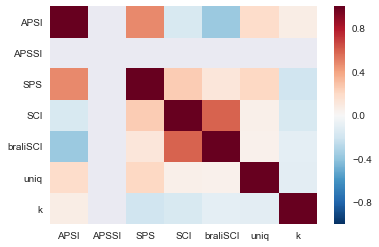

In [25]:
#The same matrix can be visualized via seaborn heatmaps
%matplotlib inline
import seaborn as sns
sns.heatmap(df.corr())

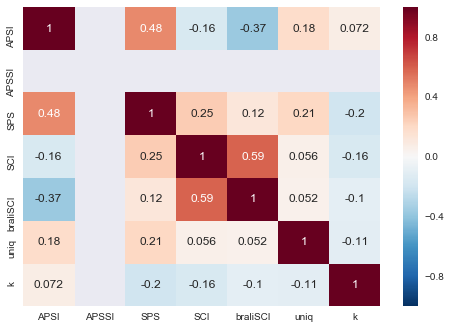

In [78]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

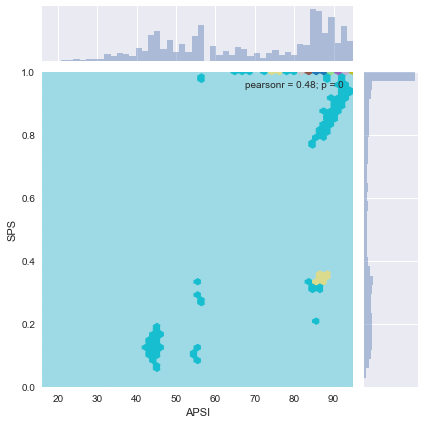

In [43]:
#Look at the particular notation seaborn uses to select the data to plot. It is perfectly integrated with 
#the dataframe objects
g = sns.jointplot("APSI", "SPS", data=df, kind="hex", cmap="Vega20_r")

In [47]:
import matplotlib.pyplot as plt


# Figures || Axes || Axis

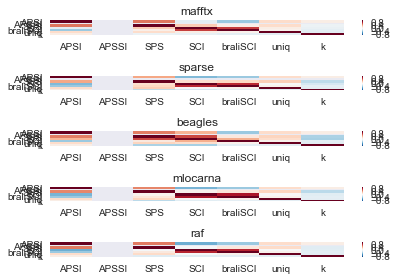

In [46]:
#meglio ciclare su più condizioni df.method==meth per fare più plots invece del groupby
fig,ax=plt.subplots(df.method.nunique())

for i,meth in enumerate(df.method.unique()):
    sns.heatmap(df[df.method==meth].corr(), ax=ax[i] )
    ax[i].set_title(meth)

plt.tight_layout()

# plot the SPS vs APSI

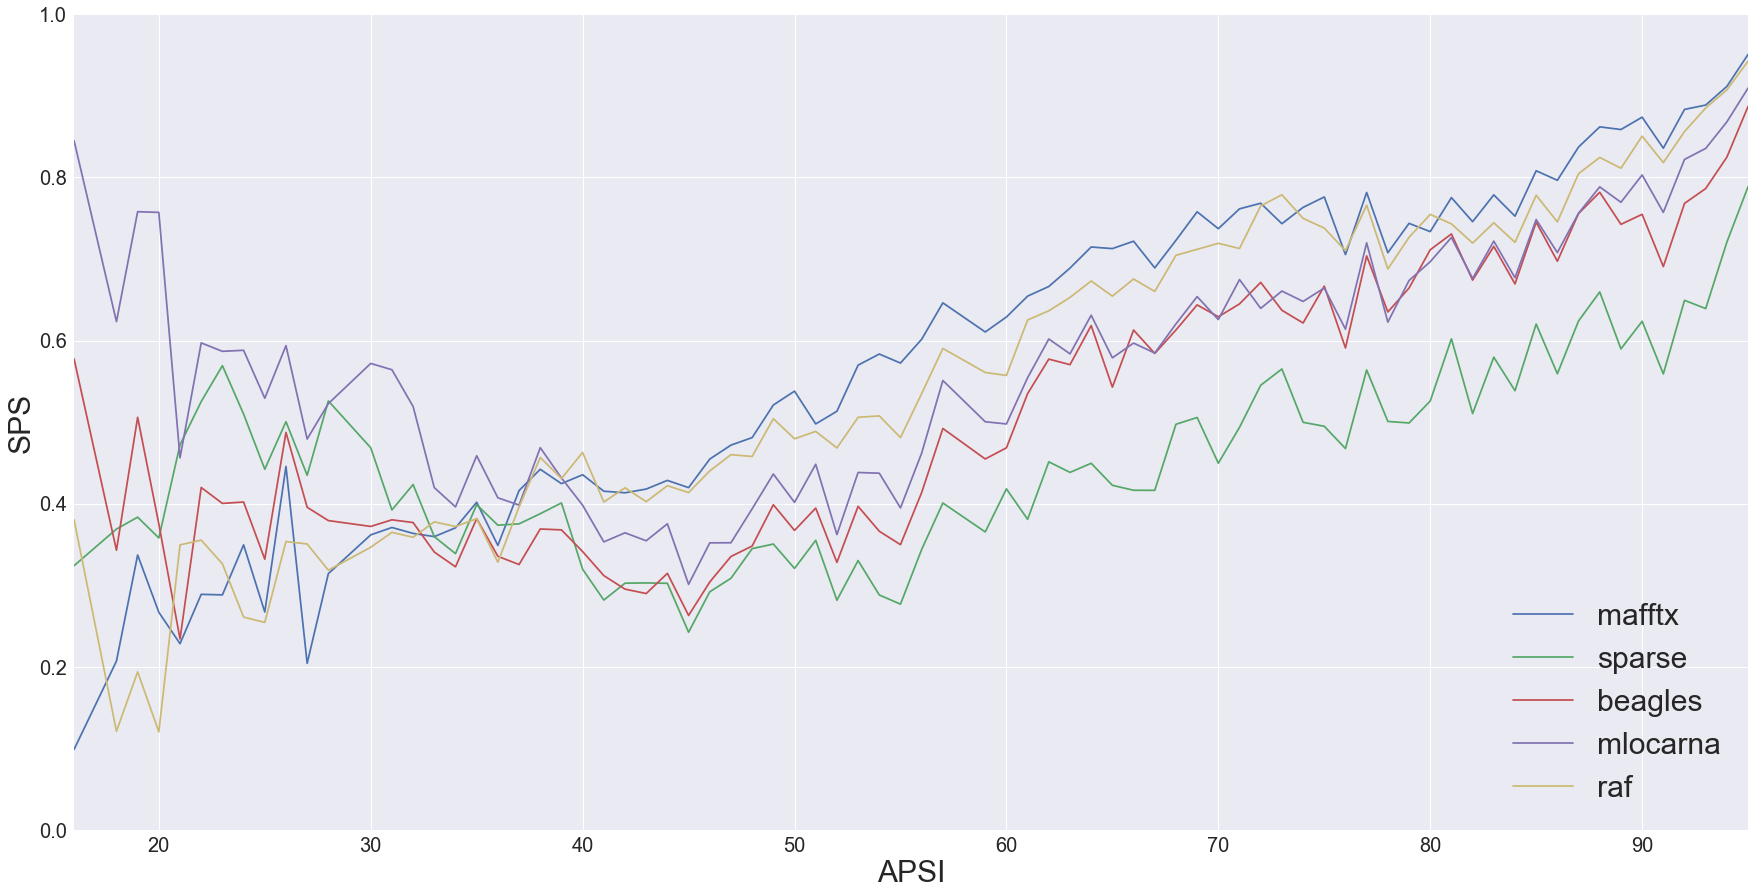

In [53]:
#The same APSI may appear more than once, we have to group that data and make a mean.

fig, ax = plt.subplots(figsize=(30,15) )

# We change the fontsize of major ticks label 
ax.set_xlabel('APSI', fontsize=30)
ax.set_ylabel('SPS', fontsize=30)

for meth in df.method.unique():
    df[df.method == meth].groupby(['APSI']).mean().plot(y='SPS', ax=ax, label=meth, fontsize=20)

ax.legend(fontsize=30)

ax.set_yticks(np.arange(0, 1.1, 0.2))

plt.savefig("SPSallk.png")
plt.savefig("SPSallk.pdf")

In [73]:
## The same plot can be done for separated values of k, how many k's are there?
sorted(df.k.unique())

[2, 3, 5, 7, 10, 15]

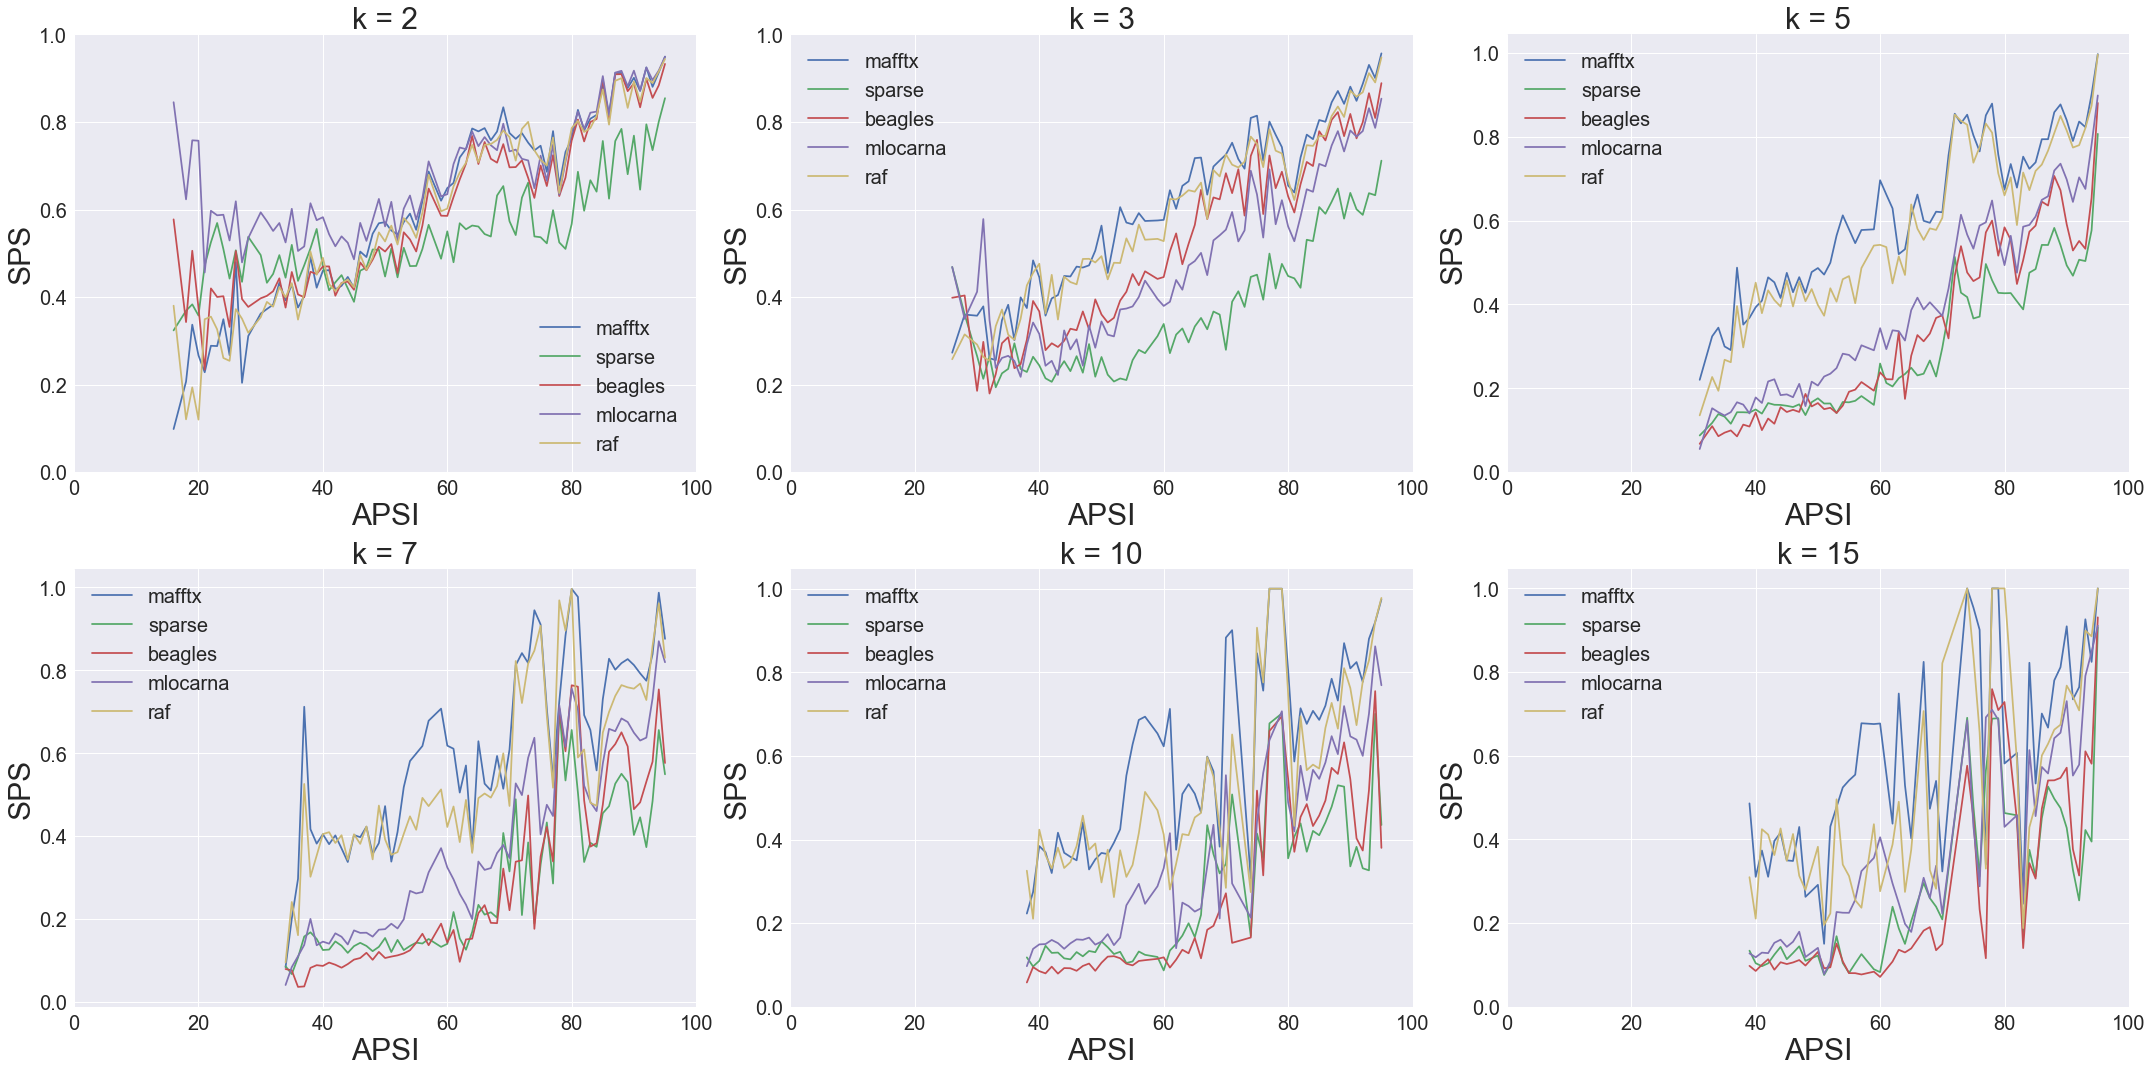

In [57]:
fig, ax = plt.subplots(2,3, figsize=(30,15) )

for i,k in enumerate(sorted(df.k.unique())):

    #remember how to map a 1D array to a 2D array...
    #The division in Python 3 is defined as a float division, even between integers.
    #If we want the standard integer division (as per Python2.7) we need to use a "//" instead of "/"
    ax[i//3,i%3].tick_params(axis='both', which='major', labelsize=30)



    ax[i//3,i%3].set_xlabel('APSI', fontsize=30)
    ax[i//3,i%3].set_ylabel('SPS', fontsize=30)
    ax[i//3,i%3].set_title("k = {}".format(k), fontsize=30)
    
    for meth in df.method.unique():
        selectk= df.k==k
        selectmeth= df.method==meth
        df[selectmeth & selectk].groupby(['APSI']).mean().plot(y='SPS', ax=ax[i//3,i%3], label=meth, fontsize=20)
   
    ax[i//3,i%3].set_yticks(np.arange(0,1.1,0.2))
    ax[i//3,i%3].set_xticks(np.arange(0,101,20))
    ax[i//3,i%3].legend(fontsize=20, loc='best')
plt.tight_layout()
plt.savefig("manyks.png")
plt.savefig("manyks.pdf")